# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [0]:
import numpy as np


### Generate data

In [0]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    # YOUR CODE HERE
    y=np.sin(x)
    return y

In [51]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [52]:

np.random.random((1,10)).shape

(1, 10)

In [0]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,2 pi)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    # YOUR CODE HERE
    x=np.random.random(N)*2*np.pi
    yd=np.sin(x)
    return x, yd

In [54]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()


Test passed 👍


### Plotting

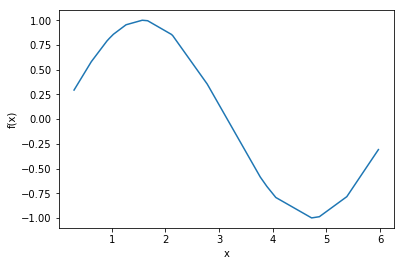

In [55]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [0]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    # YOUR CODE HERE
    A=np.zeros((len(x),D+1))
    for i in range(D+1):
      A[:,i]=x**(i)
    return A

In [57]:
createA(np.array([1,2,3]), 3)


array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [58]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the least square solution you learnt in the video

In [0]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    # YOUR CODE HERE
    w=np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A).dot(yd))
    return w

In [60]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

Test passed 👍


### Estimate y from the model, given x

In [0]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    # YOUR CODE HERE
    A= createA(x, len(w)-1)
    y=A.dot(w)
    return y

In [62]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

Test passed 👍


### Estimate Error
Find E as the mean squared error

In [0]:
from sklearn.metrics import mean_squared_error


In [0]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    n=len(y)
    mse=(sum((y-yd)**2))/n
    print(mse)
    #mse=mean_squared_error(y, yd)
    return mse

In [65]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

0.039999999999999994
Test passed 👍


### Plotting


In [0]:
def plotModel(x, y, yd):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [0]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    #x=np.linspace(0,1,N)
    
    x,yd=generateX_fx(N)
    A=createA(x, D)
    w=train_w(A, yd)
    y=predict_y(w, x)
    
    
    mse=compute_mse(y, yd)
    return x, y, yd, w, mse

0.20258439960373315
[ 0.74669167 -0.05031297 -0.04377453]
MSE on train data =  0.20258439960373315
Test passed 👍


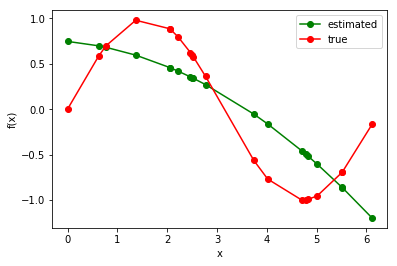

In [68]:
'''testing'''
def test_trainModel():
    N = 20
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==20
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_trainModel()

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [0]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x,yd=generateX_fx(Ntest)
    A=createA(x,w.shape[0]-1)
    y=predict_y(w,x)
    mse=compute_mse(y,yd)
    return x, y, yd, mse

0.005547599649597528
[ 3.77674103e-01  7.29343414e-01  1.15844727e-01 -2.19841003e-01
  2.71148682e-02 -3.61251831e-03  3.83090973e-03 -1.02829933e-03
  1.13964081e-04 -5.66989183e-06  1.00932084e-07]
MSE on train data =  0.005547599649597528
0.0070830473894216
MSE on test data =  0.0070830473894216
Test passed 👍


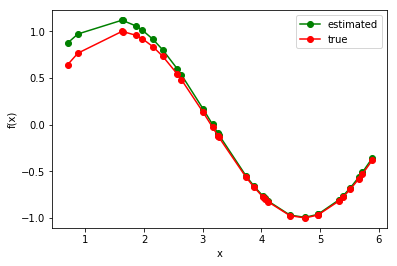

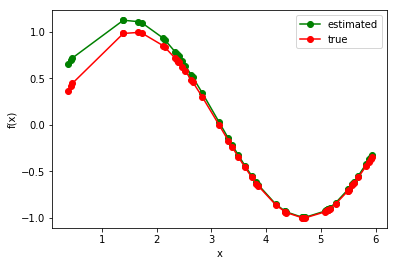

In [70]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

0.27199443843390264
0.8306193921862471
0.8764701173840923
2.0087156568216513
9.207738190256168e-07
0.00036596467193790124
1.5752331885914534e-05
1.226306188174604e-05


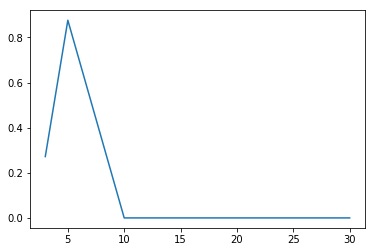

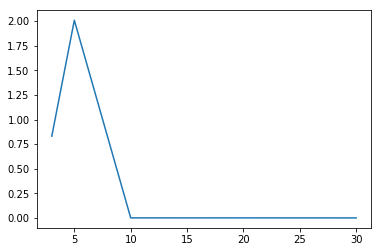

In [71]:
import matplotlib.pyplot as plt
N=[3,5,10,30]
D=5
train_error=[]
test_error=[]
for i in N:
  li=trainModel(i,D)
  train_error+=[li[-1]]
  w=li[-2]
  test_error+=[testModel(i,w)[-1]]
plt.plot(N,train_error)
plt.show()
plt.plot(N,test_error)
plt.show()


   

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

0.5096855807663062
0.6959201145726166
For D =  0


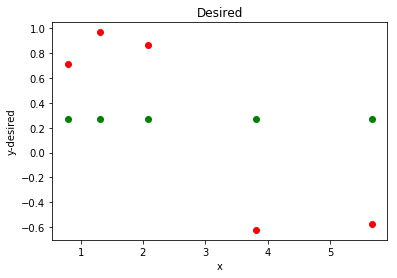

--------------------------------------------------------------------------------------------------------------------------------------------------
0.3082525271298959
0.21370965060480782
For D =  1


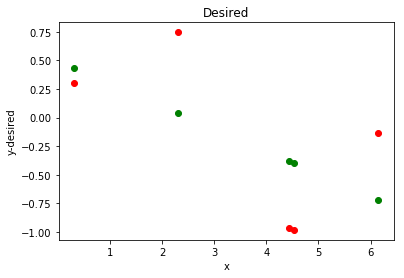

--------------------------------------------------------------------------------------------------------------------------------------------------
0.0021949579866144503
0.4912228682929859
For D =  2


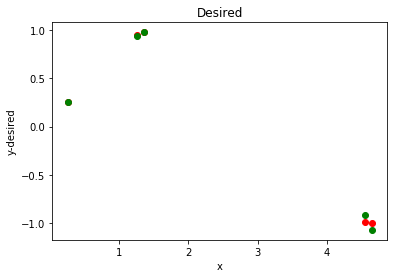

--------------------------------------------------------------------------------------------------------------------------------------------------
7.504322832488321e-19
0.04321172263133875
For D =  4


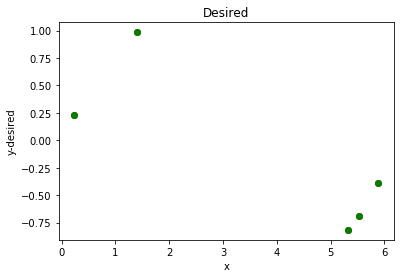

--------------------------------------------------------------------------------------------------------------------------------------------------
0.5734735083354445
0.1393623009246416
For D =  7


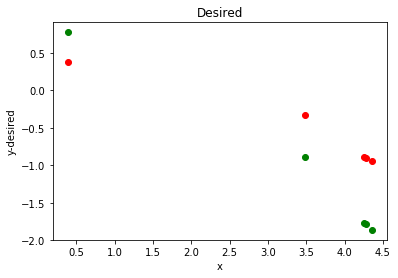

--------------------------------------------------------------------------------------------------------------------------------------------------
0.10527090885788208
83830.77513372412
For D =  12


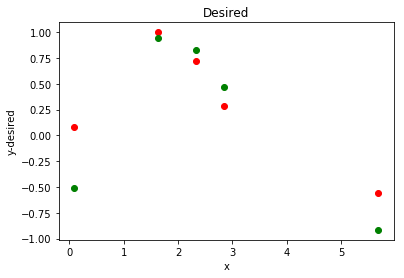

In [0]:
N=5
D=[0,1,2,4,7,12]
train_error2=[]
test_error2=[]
for i in D:
  li=trainModel(N,i)
  train_error2+=[li[-1]]
  w=li[-2]
  test_error2+=[testModel(N,w)[-1]]
  print("For D = ",i)
  plt.plot(li[0],li[2],'r o')
  plt.plot(li[0],li[1],'g o')
  plt.title("Desired")
  plt.xlabel('x')  
  plt.ylabel('y-desired')
  plt.show()
#   plt.plot(li[0],li[1],'o')
#   plt.title("Predicted")
#   plt.xlabel('x')  
#   plt.ylabel('y-predicted')
#   plt.show()  
  print("--------------------------------------------------------------------------------------------------------------------------------------------------")

  
  
plt.plot(D,train_error2,'b-o')
plt.xlabel('D')  
plt.ylabel('Training error')
plt.show()
plt.plot(D,test_error2,'b-o')
plt.xlabel('D')  
plt.ylabel('Test error')
plt.show()